# BAA doc visualisations

## Sound visualisation

In [1]:
%pip install librosa


The following command must be run outside of the IPython shell:

    $ pip install librosa

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import IPython

/opt/conda/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
example_file_path = "/home/jovyan/work/data/DCASE18-Task5-development/audio/DevNode3_ex217_59.wav"
y, sr = librosa.load(example_file_path)
IPython.display.Audio(y, rate=sr)

Figure sizes
- 15, 5 for thesis images
- 10, 10 for presentation
- 7, 5 for study doc

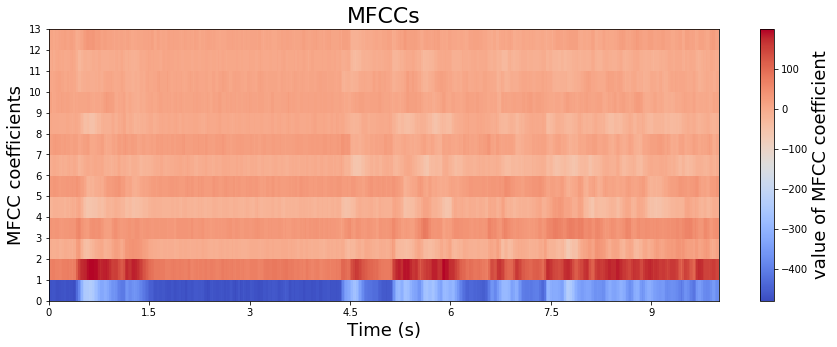

In [4]:
# Get more components
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Visualize the MFCC series
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')

clb = plt.colorbar()
clb.set_label('value of MFCC coefficient', fontsize=18)

plt.yticks(np.arange(0, 14, 1.0))
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('MFCC coefficients', fontsize=18)
plt.title('MFCCs', fontsize=22)
plt.savefig('mfccs.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

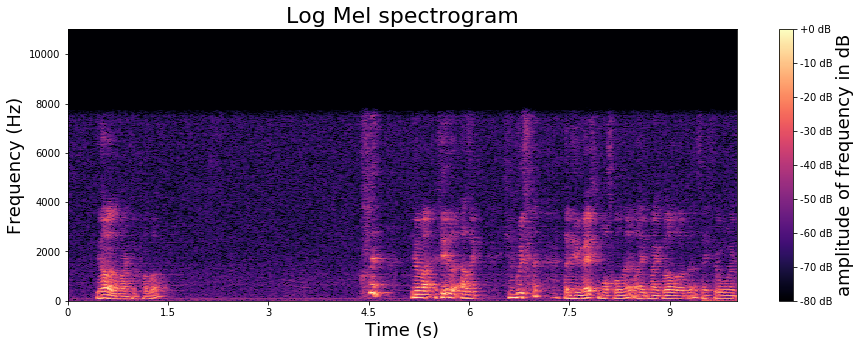

In [3]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(15, 5))
librosa.display.specshow(D, y_axis='linear', x_axis='time')

clb = plt.colorbar(format='%+2.0f dB')
clb.set_label('amplitude of frequency in dB', fontsize=18)

plt.title('Log Mel spectrogram', fontsize=22)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Frequency (Hz)', fontsize=18)
plt.savefig('log_mel_spectrogram.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

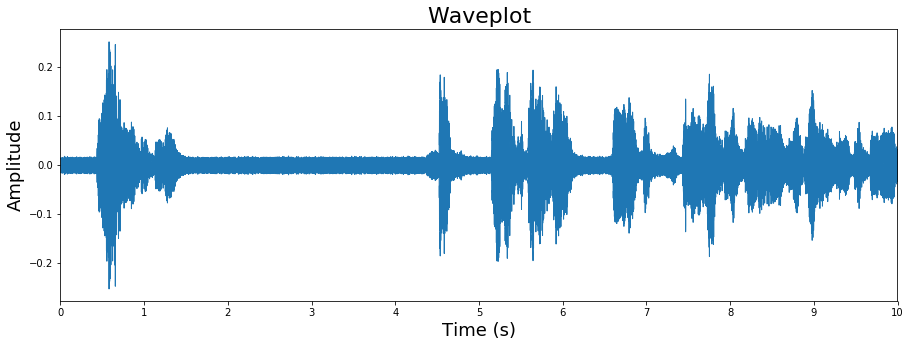

In [5]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr=sr)
plt.title('Waveplot', fontsize=22)
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.savefig('raw_waveform.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

## Study Doc visualisations

In [2]:
import matplotlib.pyplot as plt
import csv
import os

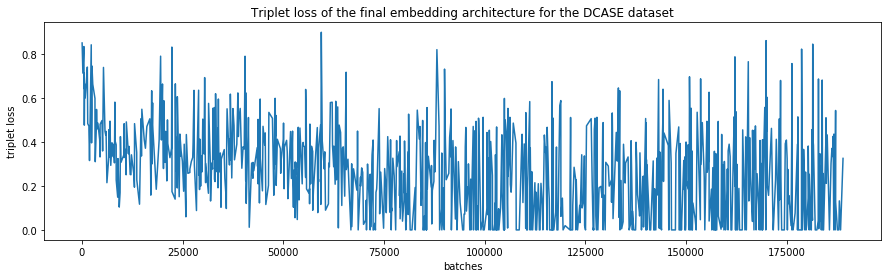

In [13]:
x = []
y = []

plt.figure(figsize=(15, 4))

plot_experiments = []

legend_names = ["final model batches"]
directory = "data/final_dcase"
for filename in os.listdir(directory):
    if filename.endswith(".csv"):

        plotname = filename.split(".")[0]
        plotname = plotname.replace("_", "=")
        plotname = plotname.replace("-", ".")

        if plotname in legend_names:
            with open(os.path.join(directory, filename),'r') as csvfile:
                plots = csv.reader(csvfile, delimiter=',')
                next(plots)
                index = len(x)
                x.append([])
                y.append([])
                for row in plots:
                    x[index].append(float(row[1]))
                    y[index].append(float(row[2]))
                    

                plt.plot(x[index], y[index], label=plotname)
    else:
        continue

plt.xlabel('batches')
plt.ylabel('triplet loss')
plt.title('Triplet loss of the final embedding architecture for the DCASE dataset')
#plt.legend()
plt.savefig('Triplet_loss_DCASE_final.png', dpi=200, format='png', bbox_inches='tight')
plt.show()
plt.close()

## F1 score visualisation

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines))]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

[0.95, 0.78, 0.86]
[0.81, 0.93, 0.86]
[0.76, 0.64, 0.7]
[0.72, 0.96, 0.82]
[0.99, 0.85, 0.92]
[0.73, 0.69, 0.71]
[0.87, 1.0, 0.93]
plotMat: [[0.95, 0.78, 0.86], [0.81, 0.93, 0.86], [0.76, 0.64, 0.7], [0.72, 0.96, 0.82], [0.99, 0.85, 0.92], [0.73, 0.69, 0.71], [0.87, 1.0, 0.93]]
support: [776, 1177, 396, 379, 862, 408, 286]


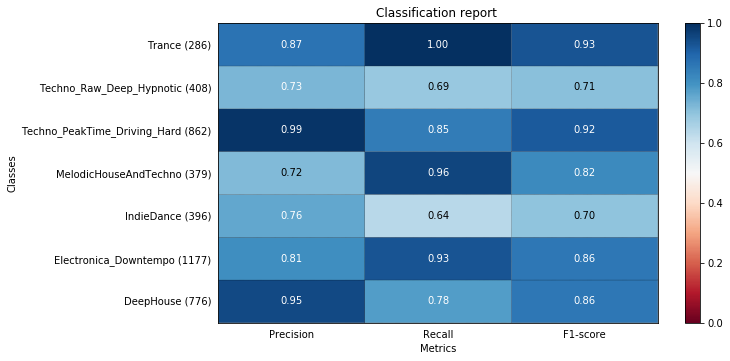

In [5]:
sampleClassificationReport = """             precision    recall  f1-score   support

                   DeepHouse       0.95      0.78      0.86       776
       Electronica_Downtempo       0.81      0.93      0.86      1177
                  IndieDance       0.76      0.64      0.70       396
       MelodicHouseAndTechno       0.72      0.96      0.82       379
Techno_PeakTime_Driving_Hard       0.99      0.85      0.92       862
    Techno_Raw_Deep_Hypnotic       0.73      0.69      0.71       408
                      Trance       0.87      1.00      0.93       286"""
plot_classification_report(sampleClassificationReport)
plt.savefig('music_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')
plt.show()
plt.close()